# 1. Setup Mario

In [ ]:
!pip install gym_super_mario_bros nes_py

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup Game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
env.action_space.sample()

1

In [ ]:
# Loop making random action in each frame
done = True # Created a flag, restart or not
for frame in range(100000):
    if done:
        # Start the game
        env.reset()
    # Do random actions, we are getting back state, reward, done and info
    state, reward, done, info = env.step(env.action_space.sample())
    # This show the game in screen
    env.render()
env.close()
        

In [ ]:
env.close() # Closes the game

In [5]:
state = env.reset() 

In [6]:
state.shape
#Game resolution and color channel 

(240, 256, 3)

# 2. Preprocess Env 

In [ ]:
!pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation

# FrameStack allows to stacks multiple frames, e.g. the last three in order to get notion of whats being done
# GrayScaleObservation allows to convert our colored game to a grayscale version

# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# VecFrameStack allows us to work with FrameStack ENV, and DummyVecEnv just wraps the base env into a vectorized wrapper
# Import Matplotlib to show the impact of frameStacking
from matplotlib import pyplot as plt

In [ ]:
!pip install stable-baselines3[extra]

In [8]:
# 1. Create the base env
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Env
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [9]:
state = env.reset()

In [10]:
state.shape # Now we only get 1 color 

(1, 240, 256, 4)

In [11]:
state, reward, done, info = env.step([env.action_space.sample()])

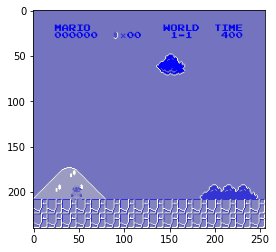

In [12]:
# Use Matplotlib to show the game frame
plt.imshow(state[0])

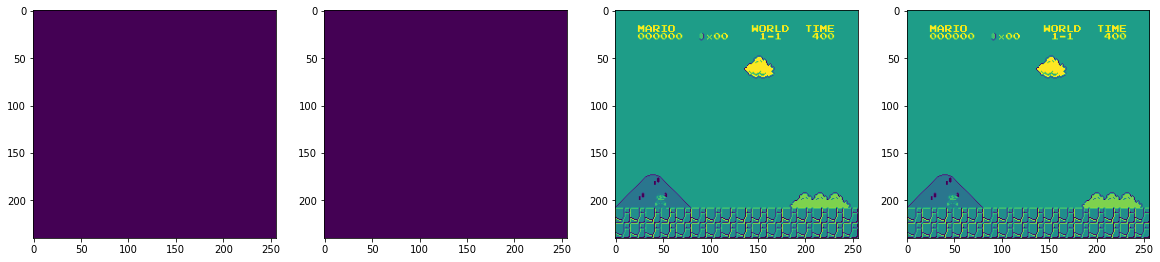

In [13]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model


In [14]:
# Import os for file path management
import os
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [15]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [16]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [17]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=50000, save_path=CHECKPOINT_DIR)

In [18]:
# This is the AI Model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train the AI model, this is where the AI model starts to learn!
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./logs/PPO_8
----------------------------
| time/              |     |
|    fps             | 86  |
|    iterations      | 1   |
|    time_elapsed    | 5   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 67            |
|    iterations           | 2             |
|    time_elapsed         | 15            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 4.4422923e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.0043        |
|    learning_rate        | 1e-06         |
|    loss                 | 180           |
|    n_updates            | 10            |
|    policy_gradient_loss | -8.28e-05     |
|    value_loss           | 519           |
-------------------------

-------------------------------------------
| time/                   |               |
|    fps                  | 57            |
|    iterations           | 13            |
|    time_elapsed         | 115           |
|    total_timesteps      | 6656          |
| train/                  |               |
|    approx_kl            | 1.2185774e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | 0.00574       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0856        |
|    n_updates            | 120           |
|    policy_gradient_loss | -0.000164     |
|    value_loss           | 0.249         |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 57           |
|    iterations           | 14           |
|    time_elapsed         | 125     

------------------------------------------
| time/                   |              |
|    fps                  | 56           |
|    iterations           | 24           |
|    time_elapsed         | 216          |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 6.710179e-06 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.94        |
|    explained_variance   | 0.0021       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.11         |
|    n_updates            | 230          |
|    policy_gradient_loss | -4.7e-06     |
|    value_loss           | 0.525        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 25            |
|    time_elapsed         | 225           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 35            |
|    time_elapsed         | 318           |
|    total_timesteps      | 17920         |
| train/                  |               |
|    approx_kl            | 0.00011500961 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | -0.00143      |
|    learning_rate        | 1e-06         |
|    loss                 | 137           |
|    n_updates            | 340           |
|    policy_gradient_loss | -5.33e-08     |
|    value_loss           | 392           |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 56            |
|    iterations           | 36            |
|    time_elapsed         | 327 

-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 46            |
|    time_elapsed         | 421           |
|    total_timesteps      | 23552         |
| train/                  |               |
|    approx_kl            | 0.00010810315 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.93         |
|    explained_variance   | 0.0236        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0455        |
|    n_updates            | 450           |
|    policy_gradient_loss | -0.000711     |
|    value_loss           | 0.148         |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 47            |
|    time_elapsed         | 430 

-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 57            |
|    time_elapsed         | 524           |
|    total_timesteps      | 29184         |
| train/                  |               |
|    approx_kl            | 1.4199759e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.92         |
|    explained_variance   | 0.0705        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0934        |
|    n_updates            | 560           |
|    policy_gradient_loss | 2.4e-05       |
|    value_loss           | 0.44          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 58            |
|    time_elapsed         | 534 

------------------------------------------
| time/                   |              |
|    fps                  | 55           |
|    iterations           | 68           |
|    time_elapsed         | 628          |
|    total_timesteps      | 34816        |
| train/                  |              |
|    approx_kl            | 9.905733e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.91        |
|    explained_variance   | 0.00611      |
|    learning_rate        | 1e-06        |
|    loss                 | 0.092        |
|    n_updates            | 670          |
|    policy_gradient_loss | -0.000332    |
|    value_loss           | 0.692        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 69            |
|    time_elapsed         | 637           |
|    t

-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 79            |
|    time_elapsed         | 729           |
|    total_timesteps      | 40448         |
| train/                  |               |
|    approx_kl            | 9.1466005e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.9          |
|    explained_variance   | 0.0242        |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0334        |
|    n_updates            | 780           |
|    policy_gradient_loss | -0.000561     |
|    value_loss           | 0.12          |
-------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 80            |
|    time_elapsed         | 738 

-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 90            |
|    time_elapsed         | 832           |
|    total_timesteps      | 46080         |
| train/                  |               |
|    approx_kl            | 0.00023828202 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.89         |
|    explained_variance   | 0.00278       |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0799        |
|    n_updates            | 890           |
|    policy_gradient_loss | -0.001        |
|    value_loss           | 0.154         |
-------------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 55          |
|    iterations           | 91          |
|    time_elapsed         | 841         

------------------------------------------
| time/                   |              |
|    fps                  | 55           |
|    iterations           | 101          |
|    time_elapsed         | 936          |
|    total_timesteps      | 51712        |
| train/                  |              |
|    approx_kl            | 6.457721e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.88        |
|    explained_variance   | 0.315        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0545       |
|    n_updates            | 1000         |
|    policy_gradient_loss | 2.63e-05     |
|    value_loss           | 0.634        |
------------------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 55            |
|    iterations           | 102           |
|    time_elapsed         | 946           |
|    t

------------------------------------------
| time/                   |              |
|    fps                  | 54           |
|    iterations           | 112          |
|    time_elapsed         | 1045         |
|    total_timesteps      | 57344        |
| train/                  |              |
|    approx_kl            | 9.256019e-05 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.89        |
|    explained_variance   | 0.0141       |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0637       |
|    n_updates            | 1110         |
|    policy_gradient_loss | -0.000446    |
|    value_loss           | 0.112        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 54           |
|    iterations           | 113          |
|    time_elapsed         | 1055         |
|    total_

In [ ]:
model.save('this_is_a_test_model') #Manual Save of Model

# 4. Test it Out


In [ ]:
model = PPO.load('./train/best_model_20000')

In [ ]:
state = env.reset()

In [ ]:
model.predict(state)

In [ ]:
state = env.reset()
while True:
    action, _state = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

In [ ]:
env.close()